In this NLP project we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Load the yelp data

In [2]:
yelp = pd.read_csv('yelp.csv')

Check the head, tail, info and description

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


Let's create a new column holding the length of text the user wrote as their review message

In [7]:
yelp['text length'] = yelp['text'].apply(len)

In [8]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

Distribution of the text length

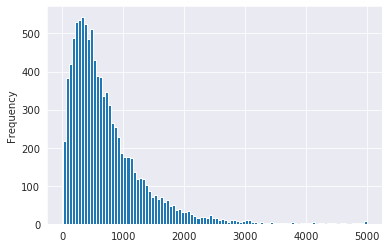

In [14]:
sns.set_style('darkgrid')
yelp['text length'].plot.hist(bins=100)

Many reviews have length of less than 1000 characters.

Common length of reviews is at say,300 to 700 characters.

There seems to be a text that's too long close to 5000 characters.Let's see this review:

In [79]:
print(yelp[yelp['text length'] == yelp['text length'].sort_values().max()]['text'].iloc[0])

In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. 

Before I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I'm on a constant quest to find that  Ideal expressed in Real Life. 

Vintage 95 isn't quite there, but it's damn close. If I ever give something Five Stars, you'll know it has pegged my Platonic Ideal. Anyway...

The plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.

The location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don't have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I'll stand on the deck

In [59]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


Histograms of text length based off the star ratings

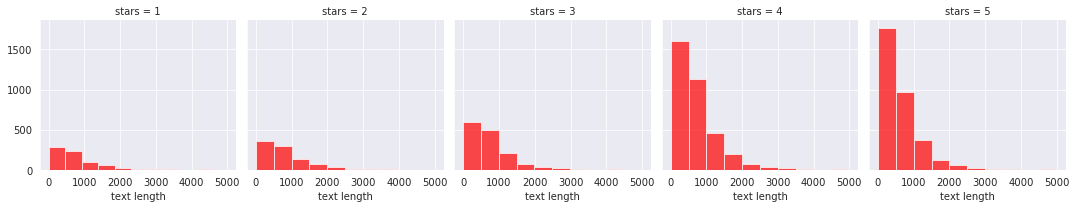

In [44]:
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text length', color='red', alpha=0.7)

Boxplot of text length for each star category

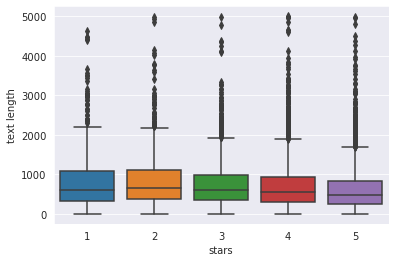

In [45]:
sns.boxplot(x='stars', y='text length', data=yelp)

Number of occurences for each star rating

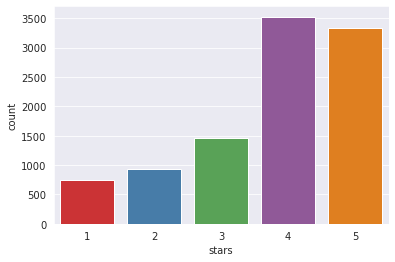

In [50]:
sns.countplot(x='stars', data=yelp, palette='Set1')

Using groupby to get the mean values of the numerical columns

In [52]:
yelp.groupby('stars').mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


Getting correlation by the same method(on mean)

In [57]:
yelp.groupby('stars').mean().corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


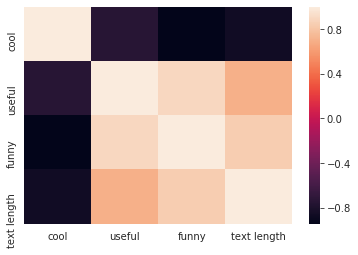

In [58]:
sns.heatmap(yelp.groupby('stars').mean().corr())

'funny' and 'useful' have a strong correlation.

# NLP

We create a dataframe containing yelp columns but only for 1 and 5 stars

In [71]:
stars1 = yelp[yelp['stars']==1]
stars5 = yelp[yelp['stars']==5]

yelp_class = pd.concat([stars1, stars5])

In [75]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498


# Text Processing

We remove punctuation and stopwords from the text reviews

In [80]:
import string
import nltk
from nltk.corpus import stopwords

In [81]:
def text_process(text):
    nopunc = [c for c in text if c not in string.punctuation] #removing punctuation
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower not in stopwords.words('english')]

We create our features and target labels

In [76]:
X = yelp_class['text']
y = yelp_class['stars']

We use sklearn's CountVectorizer to transform our text data into vector matrices of word counts called bag of words(bow)

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

Total number of words in our vocabulary

In [84]:
len(bow_transformer.vocabulary_)

26774

This is how the CountVectorizer transforms the data into vector matrices of these bow's

In [90]:
text1 = yelp_class['text'][0]

print(text1)

bow1 = bow_transformer.transform([text1])

print('------------------------------------------------------------------------------------------------------')
print(bow1)

print('Shape of matrix: ', bow1.shape)

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!
------------------------------------------------------------------------------------------------------
  (0, 2

To see which word appear 8 times(from the above cell) in the first text at column number 26127 of our bag of words

In [93]:
bow_transformer.get_feature_names()[26127]

'was'

Now transforming the whole text column

In [94]:
text_bow = bow_transformer.transform(X)

In [97]:
print(text_bow.shape)

(4086, 26774)


Amount of non-zero occurences

In [99]:
text_bow.nnz

337712

# Tfidf - Term frequency Inverse document frequency

In [100]:
from sklearn.feature_extraction.text import TfidfTransformer

In [101]:
tfidf_transformer = TfidfTransformer().fit(text_bow)

Let's transform a single text to show how tfidf works

In [105]:
tfidf1 = tfidf_transformer.transform(bow1)
print(tfidf1)
print('Shape: ', tfidf1.shape)

  (0, 26706)	0.08577805018432305
  (0, 26694)	0.06727932988397613
  (0, 26468)	0.06199956824480029
  (0, 26388)	0.08255580561800613
  (0, 26348)	0.08658056372413395
  (0, 26319)	0.050162821349125364
  (0, 26310)	0.04703729956702145
  (0, 26199)	0.10558875953416172
  (0, 26127)	0.24269729905380433
  (0, 26053)	0.0840943291509182
  (0, 26040)	0.06007371837587235
  (0, 25841)	0.1088437317360183
  (0, 25748)	0.07537174914127791
  (0, 25688)	0.044748829647446205
  (0, 25328)	0.12194722483862258
  (0, 25062)	0.06683084372253956
  (0, 24991)	0.09611549571885182
  (0, 24989)	0.02263851992440022
  (0, 24793)	0.03589112276783136
  (0, 24758)	0.051263503928041514
  (0, 24755)	0.17636447162195915
  (0, 24742)	0.1837629692555684
  (0, 24553)	0.07282428450250071
  (0, 24263)	0.061677916248003686
  (0, 23338)	0.03757589859549294
  :	:
  (0, 10462)	0.0589476882203872
  (0, 10451)	0.09750461950425068
  (0, 10090)	0.04553436401398096
  (0, 9823)	0.08678695816375927
  (0, 9579)	0.16078580789889685
  (0, 

Checking the inverse document frequency(importance of a word in the entire corpus) of a word such as 'perfect'

In [106]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['perfect']]

3.782176994836757

Now converting the entire bow corpus into a tfidf corpus

In [108]:
text_tfidf = tfidf_transformer.transform(text_bow)

In [109]:
text_tfidf.shape

(4086, 26774)

Now the data can be subjected to a classification algorithm since it's numerical.

Let's use Scikit Learn's Naive Bayes classifier

In [111]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [117]:
text_train, text_test, label_train, label_test = train_test_split(X,y, test_size=0.3)

Let's create a data pipeline to redo the transformation steps of the three algorithms all at once

In [115]:
from sklearn.pipeline import Pipeline

In [121]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [123]:
pipeline.fit(text_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7ff62bbfd320>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [124]:
predictions = pipeline.predict(text_test)

In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       217
           5       0.82      1.00      0.90      1009

    accuracy                           0.82      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.68      0.82      0.74      1226



/home/lyrax/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
